In [ ]:
# !pip install cv2
!pip install pillow
!pip install opencv-python

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [21]:
import pathlib
# dataset_url = "/content/data"
# data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path("/content/drive/MyDrive/Image").with_suffix('')


In [22]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

880


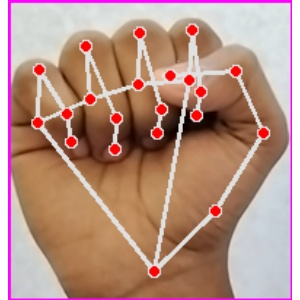

In [23]:
fist = list(data_dir.glob('fist/*'))
PIL.Image.open(str(fist[0]))

In [24]:
batch_size = 32
img_height = 300
img_width = 300

In [25]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",

  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 880 files belonging to 8 classes.
Using 704 files for training.


In [26]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)

Found 880 files belonging to 8 classes.
Using 176 files for validation.


In [27]:
class_names = train_ds.class_names
print(class_names)

['Yo', 'fist', 'ind_thumb', 'index', 'palm', 'pinky', 'thumb', 'victory']


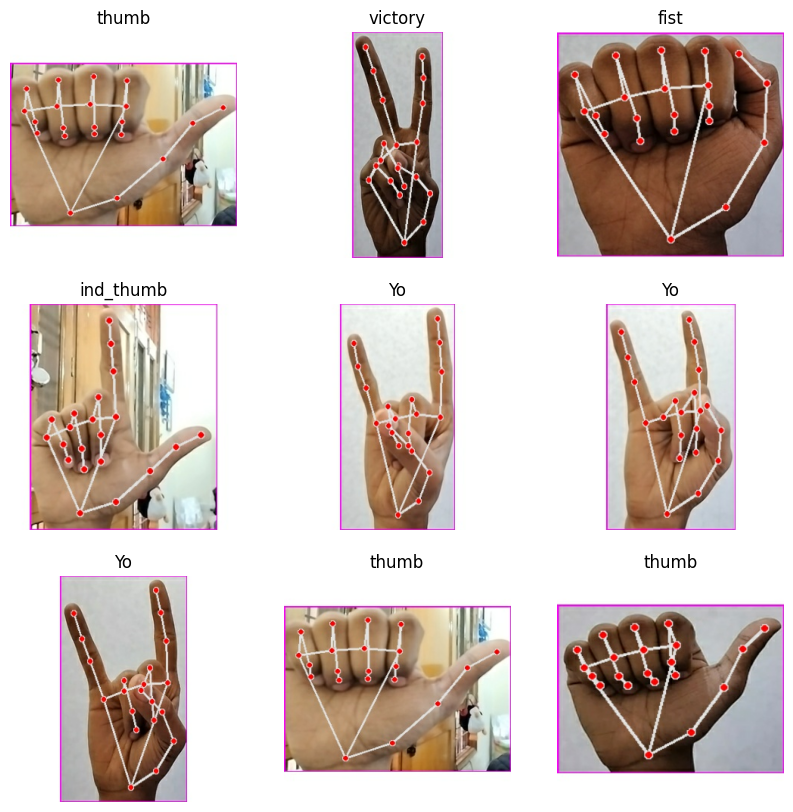

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [29]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 300, 300, 3)
(32,)


In [30]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [31]:
# normalization_layer = layers.Rescaling(1./255)

In [32]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 255.0


In [33]:
# num_classes

In [34]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs", activation="softmax")
])

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 150, 150, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)       

In [37]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


22/22 [==============================] - 74s 3s/step - loss: 1.8245 - accuracy: 0.6335 - val_loss: 0.1232 - val_accuracy: 0.9375
Epoch 2/15
22/22 [==============================] - 4s 136ms/step - loss: 0.0183 - accuracy: 0.9957 - val_loss: 8.7127e-04 - val_accuracy: 1.0000
Epoch 3/15
22/22 [==============================] - 4s 134ms/step - loss: 3.2159e-04 - accuracy: 1.0000 - val_loss: 1.0755e-04 - val_accuracy: 1.0000
Epoch 4/15
22/22 [==============================] - 5s 183ms/step - loss: 4.0044e-05 - accuracy: 1.0000 - val_loss: 2.0554e-05 - val_accuracy: 1.0000
Epoch 5/15
22/22 [==============================] - 4s 134ms/step - loss: 1.2026e-05 - accuracy: 1.0000 - val_loss: 1.6754e-05 - val_accuracy: 1.0000
Epoch 6/15
22/22 [==============================] - 4s 165ms/step - loss: 9.7707e-06 - accuracy: 1.0000 - val_loss: 1.3389e-05 - val_accuracy: 1.0000
Epoch 7/15
22/22 [==============================] - 4s 136ms/step - loss: 8.0655e-06 - accuracy: 1.0000 - val_loss: 1.1108e-0

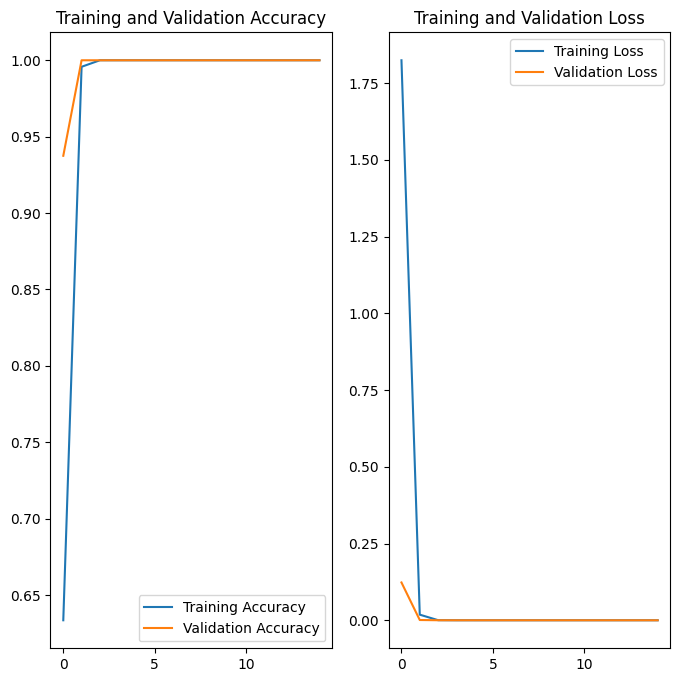

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
image = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/test-fist',
                                                    image_size=(img_height, img_width))

Found 4 files belonging to 1 classes.


In [40]:
type(image)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [41]:
k = image.as_numpy_iterator().next()

In [42]:
type(k[0])

numpy.ndarray

In [43]:
k[0][0].shape


(300, 300, 3)

In [44]:
k[0]

array([[[[110.333336, 167.33333 , 176.33333 ],
         [116.916664, 173.91667 , 182.91667 ],
         [118.333336, 175.33333 , 184.33333 ],
         ...,
         [ 25.083334,  19.083334,  19.083334],
         [ 25.166668,  19.166668,  19.166668],
         [ 21.083334,  15.083334,  15.083334]],

        [[116.5     , 173.5     , 182.5     ],
         [113.25    , 170.25    , 179.25    ],
         [114.25    , 171.25    , 180.25    ],
         ...,
         [ 33.25    ,  27.25    ,  27.25    ],
         [ 28.      ,  22.      ,  22.      ],
         [ 23.5     ,  17.5     ,  17.5     ]],

        [[119.416664, 176.41667 , 185.41667 ],
         [116.416664, 173.41667 , 182.41667 ],
         [121.916664, 178.91667 , 187.91667 ],
         ...,
         [ 23.833334,  17.833334,  17.833334],
         [ 28.333336,  22.333336,  22.333336],
         [ 38.000004,  32.000004,  32.000004]],

        ...,

        [[ 34.083374,  31.083374,  26.083374],
         [ 33.91687 ,  30.91687 ,  25.91687 ]

In [45]:
k[1]

array([0, 0, 0, 0], dtype=int32)

In [46]:
predicted_classes = model.predict(k[0])
print(predicted_classes)

1/1 [==============================] - 0s 397ms/step
[[6.83907710e-04 5.27500268e-03 8.61299217e-01 8.20238347e-06
  6.35242543e-07 1.30814880e-01 1.90626876e-03 1.18987364e-05]
 [1.34238172e-02 1.55140925e-02 7.07038403e-01 1.14337867e-03
  2.01697854e-04 2.57653683e-01 3.83411837e-03 1.19082420e-03]
 [1.13723174e-01 1.49272457e-01 1.69344589e-01 7.88197154e-04
  2.66352296e-03 5.29771745e-01 3.25466357e-02 1.88972952e-03]
 [7.94895738e-03 1.53163560e-02 7.11699605e-01 1.61568649e-04
  2.76691990e-05 2.60983765e-01 3.82884080e-03 3.32729360e-05]]


In [47]:
predicted_classes = np.argmax(model.predict(k[0]), axis =1)
print(predicted_classes)


1/1 [==============================] - 0s 21ms/step
[2 2 5 2]


In [ ]:
model.predict(train_ds.as_numpy_iterator().next()[0])

In [49]:
model.save('drive/MyDrive/mymodel_final.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install -U scikit-learn

In [ ]:
from sklearn.metrics import pair_confusion_matrix


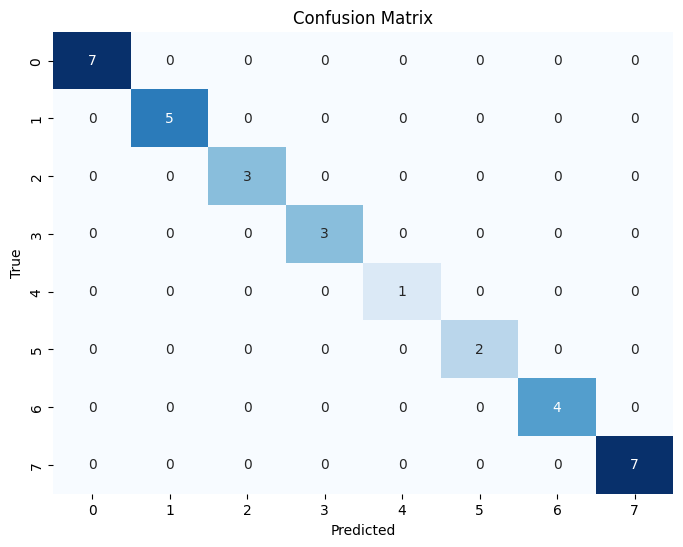

In [ ]:
# disp = pair_confusion_matrix()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have your true labels and predicted labels
true_labels = k[1]
predicted_labels = predicted_classes

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(true_labels),
            yticklabels=np.unique(true_labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
